## Titanic Shipreck
On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.
so the objective of this task is to conduct a comprehensive analysis on the dataset and provide a report with respect to factor to contributes to a passenger surviving or not

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("titanic_disaster.csv", sep = ',')
data.shape

(1309, 13)

In [2]:
data.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.drop(['PassengerId', 'Ticket'], axis= 1, inplace = True)

In [4]:
data["Parch"].unique()

array([0, 1, 2, 5, 3, 4, 6, 9], dtype=int64)

In [5]:
data.describe()

,Unnamed: 0,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,369.478992,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,248.767105,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,0.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,163.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,327.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,563.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,890.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [6]:
data

,Unnamed: 0,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,413,0,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,NaN,S
1305,414,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C105,C
1306,415,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,NaN,S
1307,416,0,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,NaN,S


In [7]:
Survive = data['Survived'] == 1
Survive

0       False
1        True
2        True
3        True
4       False
        ...  
1304    False
1305     True
1306    False
1307    False
1308    False
Name: Survived, Length: 1309, dtype: bool

In [8]:
survived = data[Survive]

In [9]:
Not_Survived = data[~Survive] == 0
Not_Survived

,Unnamed: 0,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,True,True,False,False,False,False,False,True,False,False,False
4,False,True,False,False,False,False,True,True,False,False,False
5,False,True,False,False,False,False,True,True,False,False,False
6,False,True,False,False,False,False,True,True,False,False,False
7,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1298,False,True,False,False,False,False,False,False,False,False,False
1304,False,True,False,False,False,False,True,True,False,False,False
1306,False,True,False,False,False,False,True,True,False,False,False
1307,False,True,False,False,False,False,True,True,False,False,False


<Axes: >

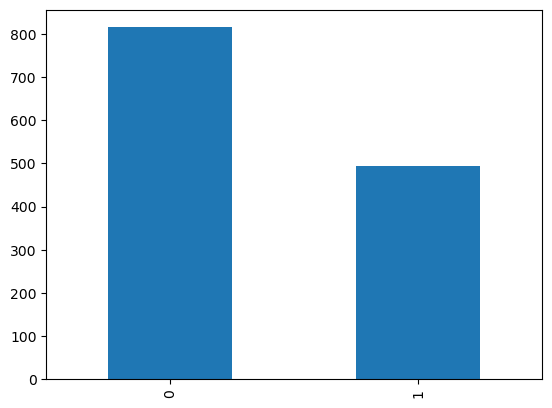

In [10]:
data.Survived.value_counts().plot(kind = 'bar')

<Axes: >

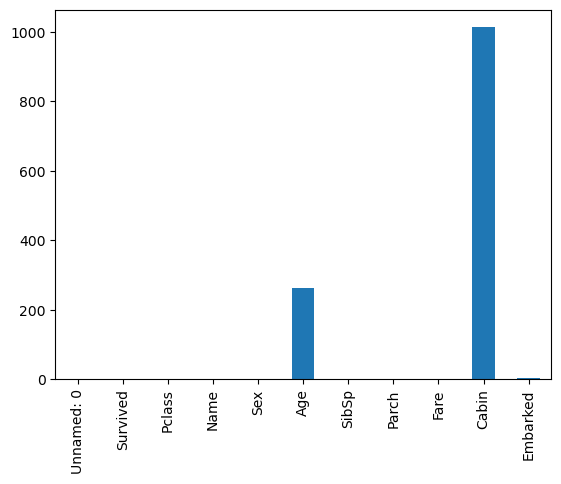

In [11]:
data.isnull().sum().plot(kind = "bar")

In [12]:
data.Sex.value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [13]:
##to differentiate and get details of male and female separately

x = data['Sex'] == 'male'
female = data[x]
male = data[~x]
male

,Unnamed: 0,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
8,8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,NaN,S
9,9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...
1300,409,1,3,"Peacock, Miss. Treasteall",female,3.0,1,1,13.7750,NaN,S
1301,410,1,3,"Naughton, Miss. Hannah",female,NaN,0,0,7.7500,NaN,Q
1302,411,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,90.0000,C78,Q
1303,412,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,7.7750,NaN,S


In [14]:
# How many people Survive (survived=1) and how many did not (survive)
Survive_counts = data['Survived'].value_counts() 
print('Survive Counts:\n', Survive_counts)

Survive Counts:
 0    815
1    494
Name: Survived, dtype: int64


In [15]:
# what is the overall percentage of people who survive?
percentage_survive = (Survive_counts[1] /Survive_counts.sum()) * 100 
print(f'percentage of people that survive: {percentage_survive:.2f}%')

percentage of people that survive: 37.74%


In [16]:
# what is the overall percentage of people who did not survive?
percentage_Not_survive = (~Survive_counts[1] /~Survive_counts.sum()) * 100 
print(f'percentage of people that did not survive: {percentage_Not_survive:.2f}%')

percentage of people that did not survive: 37.79%


In [17]:
# what is the overall percentage of male who survive?
percentage_male_survive = (Survive_counts[1] /Survive_counts.sum()) * 100 
print(f'percentage of male that survive: {percentage_survive:.2f}%')

percentage of male that survive: 37.74%


In [18]:
# what is the overall percentage of female who survive?
percentage_female_survive = (Survive_counts[1] /Survive_counts.sum()) * 100 
print(f'percentage of female that survive: {percentage_survive:.2f}%')

percentage of female that survive: 37.74%


In [19]:
# Are there any missing value in this dataset,and if so, in which columns?
data.isnull().sum()
data

,Unnamed: 0,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,413,0,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,NaN,S
1305,414,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C105,C
1306,415,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,NaN,S
1307,416,0,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,NaN,S


In [20]:
##to differentiate and get details of male and female separately

x = data['Sex'] == 'female'
male = data[x]
female = data[~x]
female

,Unnamed: 0,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
4,4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S
5,5,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,NaN,Q
6,6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,E46,S
7,7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1298,407,0,1,"Widener, Mr. George Dunton",male,50.0,1,1,211.5000,C80,C
1304,413,0,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,NaN,S
1306,415,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,NaN,S
1307,416,0,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,NaN,S


In [21]:
#how does the survival rate differ between classes(1st, 2nd and 3rd)?
data.Pclass.value_counts()


3    709
1    323
2    277
Name: Pclass, dtype: int64

In [22]:
#how does the survival rate differ between genders?
data.Sex.value_counts()


male      843
female    466
Name: Sex, dtype: int64

In [23]:
data.iloc[3 :, : 2]

,Unnamed: 0,Survived
3,3,1
4,4,0
5,5,0
6,6,0
7,7,0
...,...,...
1304,413,0
1305,414,1
1306,415,0
1307,416,0


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#load your dataset
data = pd.read_csv("tested.csv", sep = ',')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


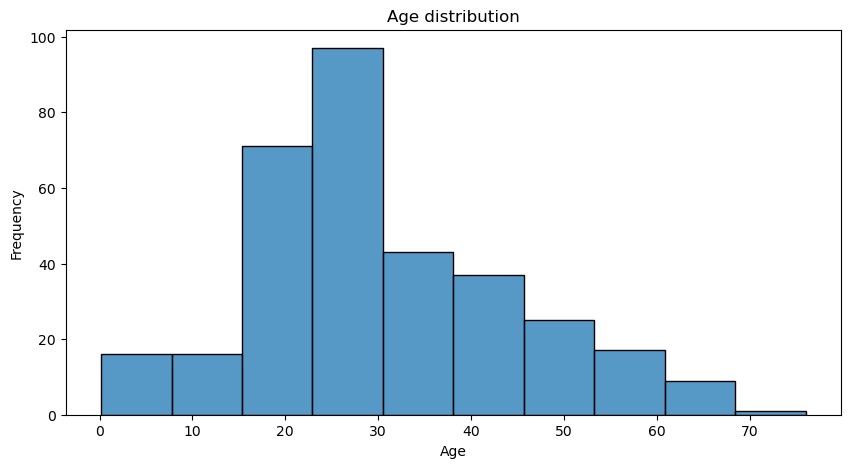

In [25]:
# what is the distribution of age?
plt.figure(figsize=(10, 5))
sns.histplot(data['Age'],bins=10)
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='Pclass', ylabel='Age'>

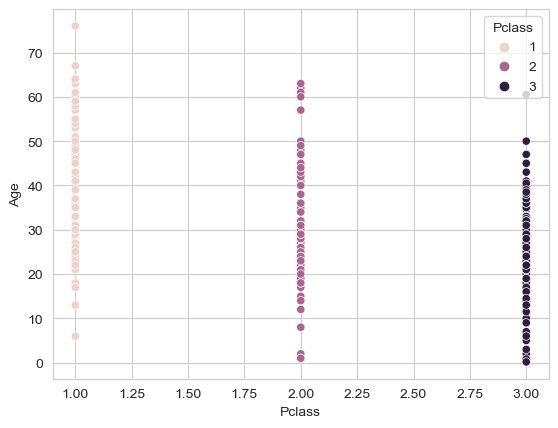

In [26]:
# how does age distribution differ from between classes?
sns.set_style('whitegrid')
sns.scatterplot(x='Pclass', y='Age', data=data, hue='Pclass')

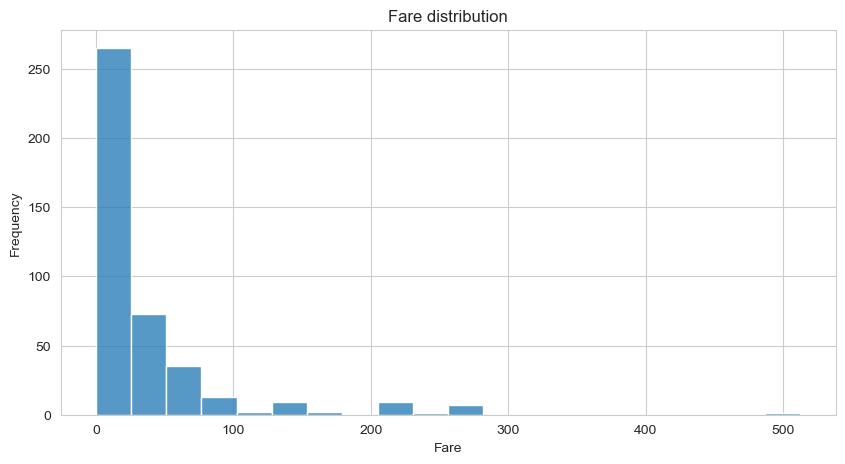

In [27]:
# what is the distribution of fares paid by passengers?
plt.figure(figsize=(10, 5))
sns.histplot(data['Fare'],bins=20)
plt.title('Fare distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='Pclass', ylabel='Fare'>

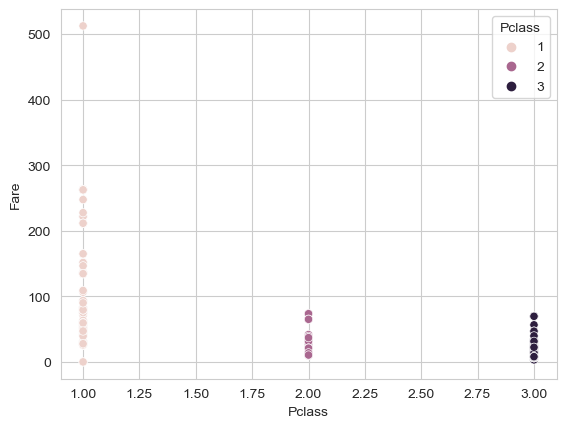

In [28]:
# how does the Fare distribution differ from between classes?
sns.set_style('whitegrid')
sns.scatterplot(x='Pclass', y='Fare', data=data, hue='Pclass')

In [29]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [30]:
#### Survival Rate by Gender:

Survival_by_gender =data.groupby('Sex')['Survived'].mean() *100
Survival_by_gender

Sex
female    100.0
male        0.0
Name: Survived, dtype: float64

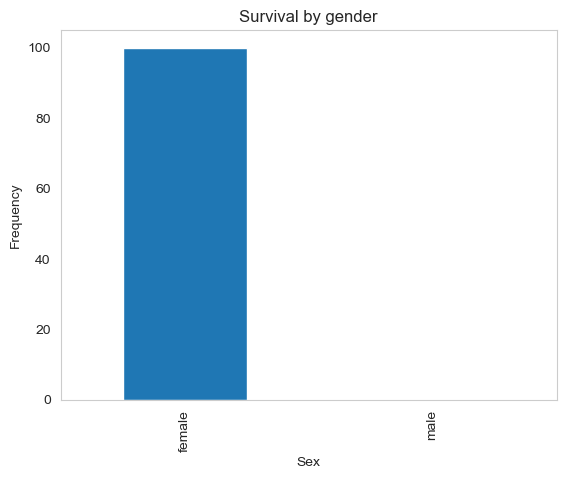

In [31]:
Survival_by_gender.plot(kind = 'bar', title = "Survival by gender", ylabel = "Frequency", grid = False);

In [32]:
# Grouping data by class and plotting


In [33]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [34]:
### 4. Family Relationships:
### Proportion of Passengers with Family:
data['Family'] = data['SibSp'] + data['Parch']
proportion_with_family = (data[data['Family'] > 0] .shape[0] / data.shape[0]) * 100
print(f"Proportion of Passengers with Family: {proportion_with_family:.4f}%")

Proportion of Passengers with Family: 39.4737%


In [35]:
import matplotlib.pyplot as plt 
import seaborn as sns 

In [36]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


In [37]:
data.groupby('Pclass')['Age'].head()

0     34.5
1     47.0
2     62.0
3     27.0
4     22.0
5     14.0
7     26.0
11    46.0
12    23.0
13    63.0
14    47.0
15    24.0
16    35.0
20    55.0
22     NaN
Name: Age, dtype: float64

Pclass
1    Axes(0.125,0.11;0.775x0.77)
2    Axes(0.125,0.11;0.775x0.77)
3    Axes(0.125,0.11;0.775x0.77)
Name: Fare, dtype: object

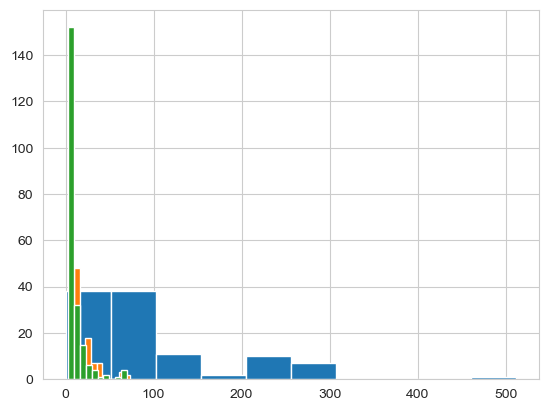

In [38]:
data.groupby('Pclass')['Fare'].hist()

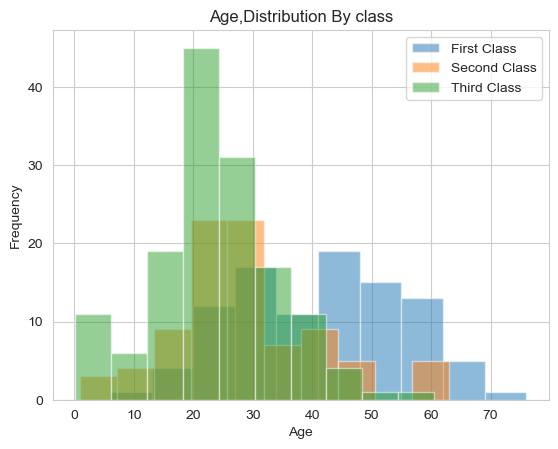

In [39]:
# GROUPINGS DATA BY CLASS AND PLOTTING
class_labels = {1: 'First Class', 2: 'Second Class', 3: 'Third Class'}
for class_val, val in data.groupby('Pclass')['Age']:
    plt.hist(val, alpha=.5, label=class_labels[class_val])

plt.title("Age,Distribution By class")
plt.xlabel('Age')
plt.ylabel("Frequency")
plt.legend()
plt.show()




In [40]:
#### Survival Rate by Class: 
survival_by_class = data.groupby('Pclass')['Survived'].mean() * 100 
survival_by_class

Pclass
1    46.728972
2    32.258065
3    33.027523
Name: Survived, dtype: float64

In [41]:
data[data["Survived"] ==1]["Pclass"].value_counts()

3    72
1    50
2    30
Name: Pclass, dtype: int64

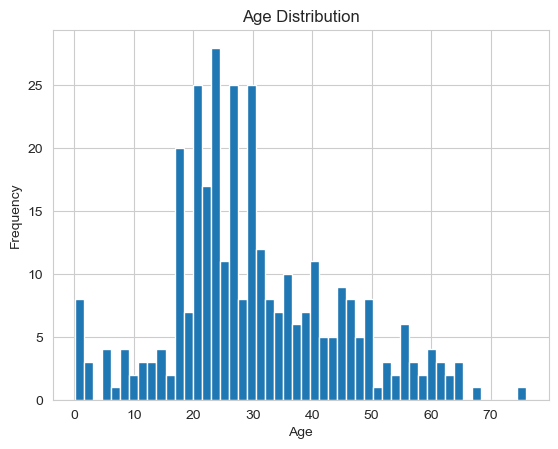

In [42]:
### 2. Age Distribution:
#### Distribution of Ages: 
data["Age"].hist(bins=50, grid = True) 
plt.title("Age Distribution") 
plt.xlabel("Age") 
plt.ylabel("Frequency");
plt.show()

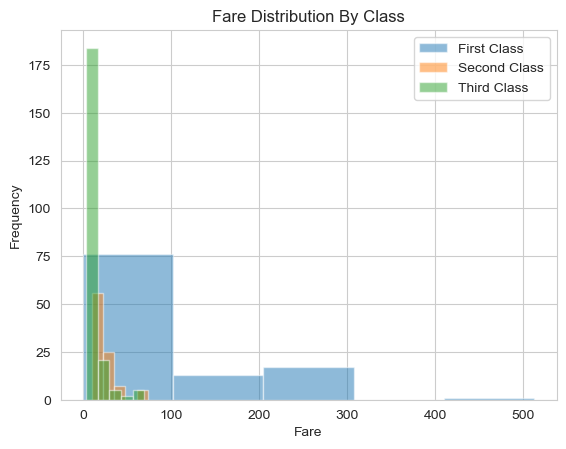

In [43]:
# Grouping data by class and plotting 
class_labels = {1: 'First Class', 2: 'Second Class', 3: 'Third Class'} 
for class_val, val in data.groupby('Pclass')['Fare']: 
    plt.hist(val, alpha=0.5, bins=5, label=class_labels[class_val])
plt.title("Fare Distribution By Class") 
plt.xlabel('Fare') 
plt.ylabel("Frequency") 
plt.legend() 
plt.show()


In [44]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family'],
      dtype='object')

In [45]:
### 4. Family Relationships: 
#### Proportion of Passengers with Family: 
data['Family'] = data['SibSp'] + data['Parch'] 
proportion_with_family = (data[data['Family'] > 0].shape[0] / data.shape[0]) * 100 
print(f"Proportion of Passengers with Family: {proportion_with_family:.4f}%")


Proportion of Passengers with Family: 39.4737%


In [46]:
### 5. Embarkation Port: 
#### Distribution of Passengers by Port: 
passengers_by_port = data['Embarked'].value_counts() 
passengers_by_port


S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [47]:
###correlation between Port and Survival
port_survival_correlation = data.groupby('Embarked')['Survived'].mean()

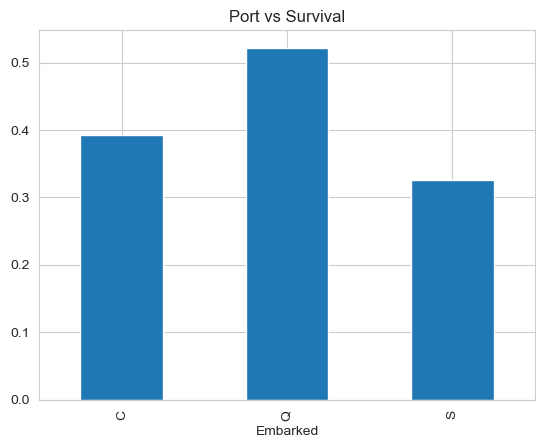

In [48]:
port_survival_correlation.plot(kind = 'bar') 
plt.title("Port vs Survival");

In [49]:
### 6. Cabin Class and Survival: 
#### Survival Rate by Cabin Class:
survival_by_cabin_class = data.groupby('Pclass')['Survived'].mean() * 100 
survival_by_cabin_class

Pclass
1    46.728972
2    32.258065
3    33.027523
Name: Survived, dtype: float64

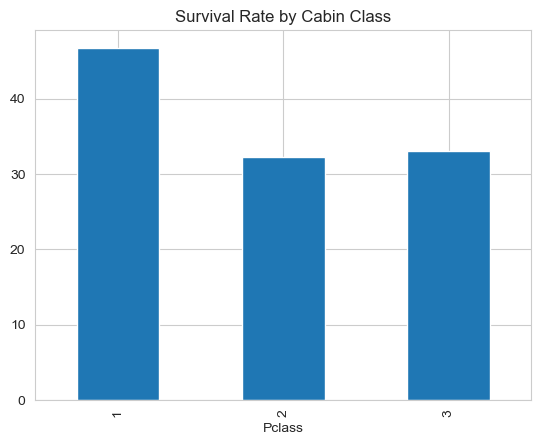

In [50]:
survival_by_cabin_class.plot(kind='bar') 
plt.title("Survival Rate by Cabin Class");

In [51]:
### 7. Name Analysis: 
#### Extract Insights from Titles:
data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False) 
title_survival_correlation = data.groupby('Title')['Survived'].mean() 
title_survival_correlation

Title
Col       0.0
Dona      1.0
Dr        0.0
Master    0.0
Miss      1.0
Mr        0.0
Mrs       1.0
Ms        1.0
Rev       0.0
Name: Survived, dtype: float64

In [52]:
data['Title'].value_counts()


Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [53]:
### 8. Missing Data: 
#### Extent of Missing Data:
missing_data = data.isnull().sum() 
missing_data


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Family           0
Title            0
dtype: int64

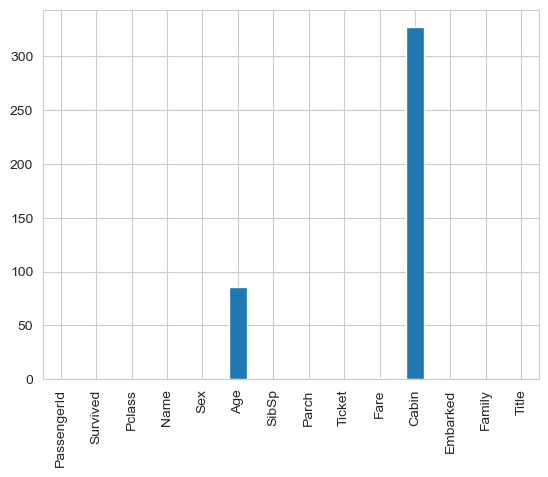

In [54]:
missing_data.plot(kind = 'bar');

<Axes: >

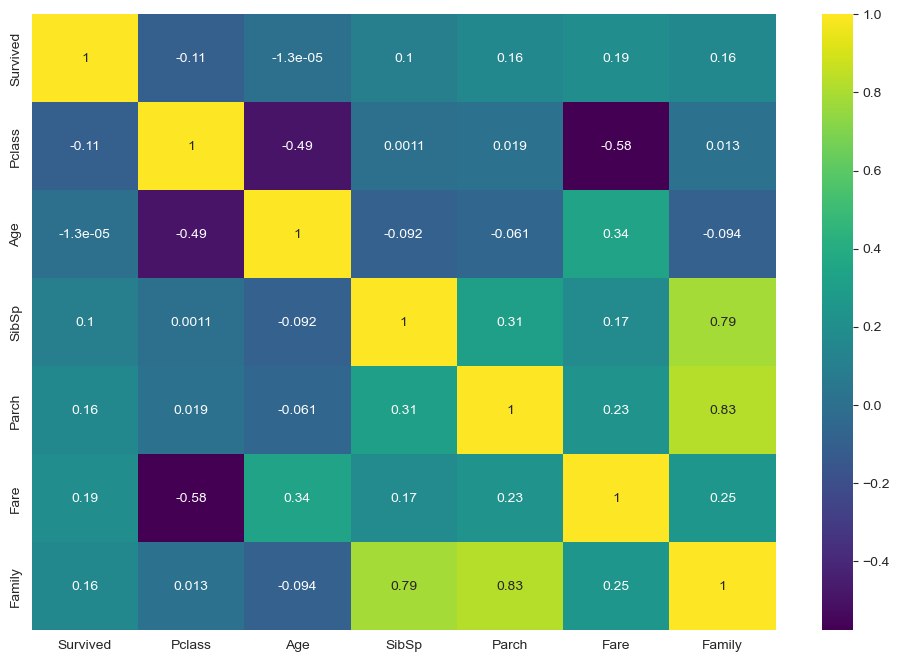

In [55]:
 import seaborn as sns 
 plt.figure(figsize = (12,8)) 
 sns.heatmap(data[['Survived', 'Pclass', 'Age', 'SibSp', 
           'Parch', 'Fare', 'Family']].corr(), annot = True, cmap = 'viridis')

In [56]:
#### Strongest Correlations with Survival: 
strongest_survival_correlations = data[['Survived', 'Pclass', 'Age', 'SibSp', 
     'Parch', 'Fare', 'Family']].corr()['Survived'].sort_values(ascending=False) 
strongest_survival_correlations

Survived    1.000000
Fare        0.191514
Family      0.161803
Parch       0.159120
SibSp       0.099943
Age        -0.000013
Pclass     -0.108615
Name: Survived, dtype: float64

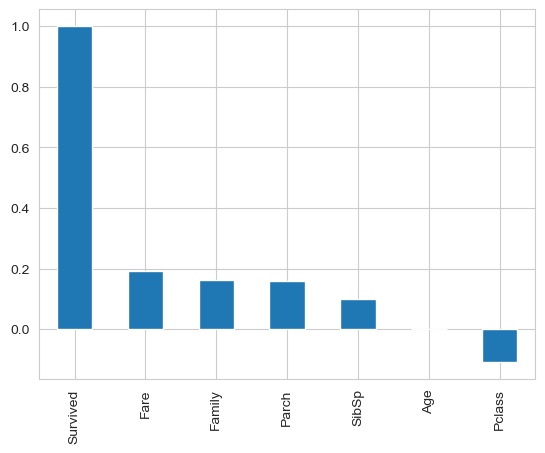

In [57]:
strongest_survival_correlations.plot(kind = "bar");

In [58]:
(data['Survived']!=0)

0      False
1       True
2      False
3      False
4       True
       ...  
413    False
414     True
415    False
416    False
417    False
Name: Survived, Length: 418, dtype: bool

In [59]:
(data['Survived']!=1)

0       True
1      False
2       True
3       True
4      False
       ...  
413     True
414    False
415     True
416     True
417     True
Name: Survived, Length: 418, dtype: bool

In [60]:
X=data['Survived']==1
data[X]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Title
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,Mrs
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2,Mrs
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,0,Miss
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,0,Mrs
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S,1,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,1301,1,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S,2,Miss
410,1302,1,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q,0,Miss
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q,1,Mrs
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S,0,Miss


In [61]:
x = ((data['Survived']!=0) & (data['Survived']!=1))

In [62]:
data[x]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Title


In [63]:
import pandas as pd
train = pd.read_csv("train.csv")
test = pd.read_csv("tested.csv")

In [64]:
train.shape

(891, 12)

In [65]:
test.shape

(418, 12)

In [66]:
data = pd.concat([train,test], axis = 0)


In [67]:
# saving the joined/full dataset to csv formart
# data.to_csv("titanic_disaster.csv")